# Conjugation workflow - protocol using the Opentron  

In [1]:
from actinomation.common import (
    display_deck_design, display_96well_plate_design,
    display_15ml_falcon_rack, display_50ml_falcon_rack
)

from actinomation.conjugation import (
    conjugation_volumes, 
    display_form, conjugation_coordinates, 
    conjugation_consumables_position, conjugation_consumables_all, 
    create_conjugation_protocol,
    ConjugationRunner,
    conjugation_upload
)

The complete workflow for the conjugation using the Opentron is as following:

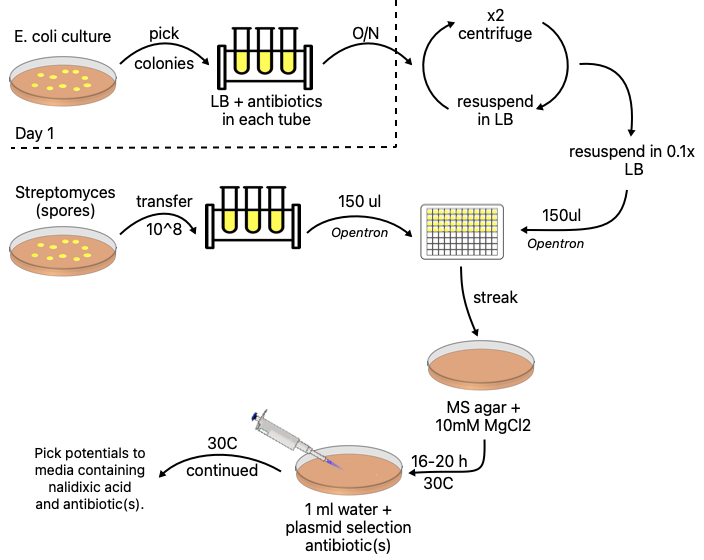

#### To perform a succesful conjugation by use of the Opentrons the following items are necessary:

- Competent *E. coli* cells with plasmid (up to 18)
- Streptomyces grown on lawn(s) (up to 30)
- Selection antibiotics
- Nalidixic acid
- 96 deepwell plate (up to 2)
- Rack for six 50mL tubes (up to 3) 
- Rack for fifteen 15mL tubes (up to 2)
- MS agar plates
- ISP2 plates with selection antibiotics + nalidixic acid
- 300 ul tips (up to 2)
- 1000 ul tips

Using a 96-well plate for end-result allows for an easy mix of up to 96 combinations where the robot will do the following pattern:

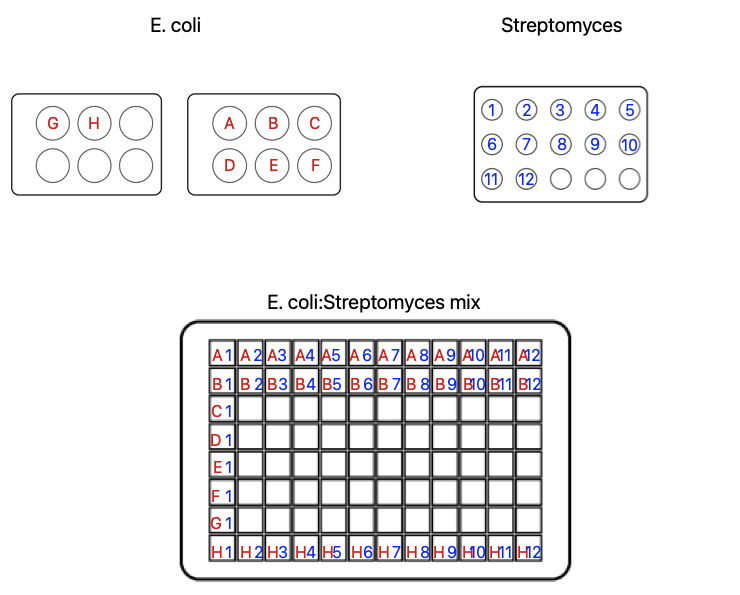

Depending on how many combinations of plasmids and Streptomyces you want to test, the number of each item varies. The same goes for the pattern on the 96-well plates. For instance, if you would have two E. coli strains, A and B, and wanted to test A with four different streptomyces, but test B with 6 streptomyces, it would look like this:

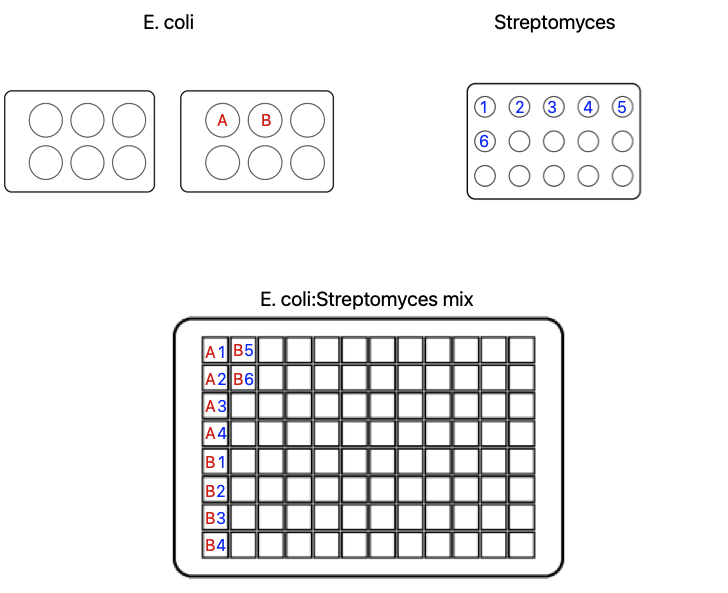

### Readability - what are the names of your plasmids as well as your Streptomyces strains?

In [2]:
conjugation_df = conjugation_upload()

HTML(value="<h1 style='font-size:18px'> Please choose your tab-separated .txt file. Remember all important inf…

Output(layout=Layout(max_height='50px', overflow='auto'))

In [3]:
ecoli, streptomyces, plasmid_antibiotics, competent_antibiotics = conjugation_df()
conjugation_mix, ecoli_tubes = display_form(ecoli, streptomyces)

# Day 1: O/N of E. coli culture

For the first day, before doing the conjugation, an O/N culture of the transformants is necessary. To do this inoculate your colonies in liquid LB media with selection antibiotics.
After this, you will wash them in an equal amount of LB two times before resuspending your pellet in 0.1 of the volume. Per conjugation done on the robot you will need 150ul+10% of *E. coli* and streptomyces. For the robot to not be submerged in sample, there should not be more than 6ml of streptomyces in the 15ml tubes. If more than this is necessary for a specific strain two tubes with different names are necessary. Here you can see the final minimum volume you will need per E. coli and per streptomyces for the robot to complete the run:

In [4]:
strep_volume, ecoli_volume = conjugation_volumes(conjugation_mix)
fill_ins, consumables_list = conjugation_consumables_position(conjugation_mix,ecoli_tubes)
conjugation_consumables_all(conjugation_mix, consumables_list, plasmid_antibiotics, competent_antibiotics, strep_volume, ecoli_volume)

,Name,Type,Amount/Volume
1,Mach1::pGUS,Sample (E. coli),165.0 uL
2,coelicolor,Sample (Streptomyces),165.0 uL


All necessary consumables, liquids and material will also be found in an excel-file that is created.

# Day 2: O/N of E. coli culture

## 1. step - prepping the *E. coli* and Streptomyces in tubes


#### For this the steps needed to be done manually are:

1. Centrifugation and resuspension of E. coli 2x in LB before resuspending it in 0.1x volume LB
2. Transfer of Streptomyces spores from lawn(s) to 15 mL Falcon tubes with a total of 6mL media

## 2. step - mixing of competent *E. coli* cells with Streptomyces

For this step the only manual step is the placing of tips, racks of tubes and plates. 

### For the setup on the Opentron, this will look like the following diagram:

In [5]:
display_deck_design(fill_ins)

### Rack setup: 15ml tube(s) with Streptomyces:

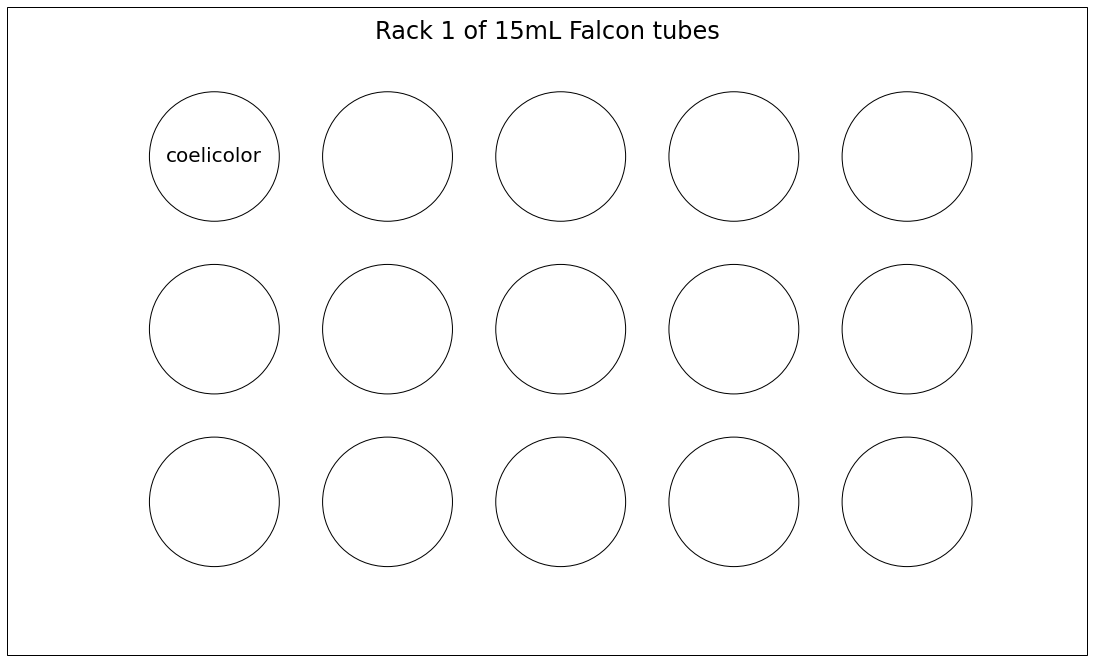

In [6]:
streptomyces_list, plate_fill_ins = conjugation_coordinates(conjugation_mix)
display_15ml_falcon_rack(streptomyces_list, "Conjugation")

### Rack setup: 50ml tube(s) with E. coli:

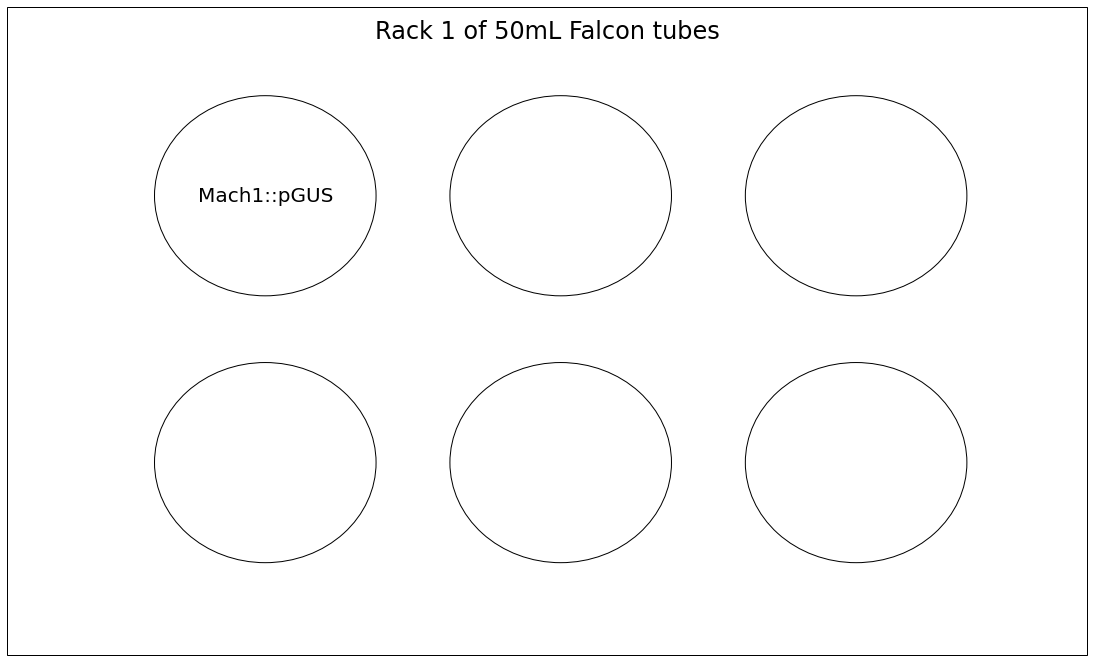

In [7]:
display_50ml_falcon_rack(ecoli_tubes, "Conjugation")

### For the final product, the 96-well plate(s) will look as following:

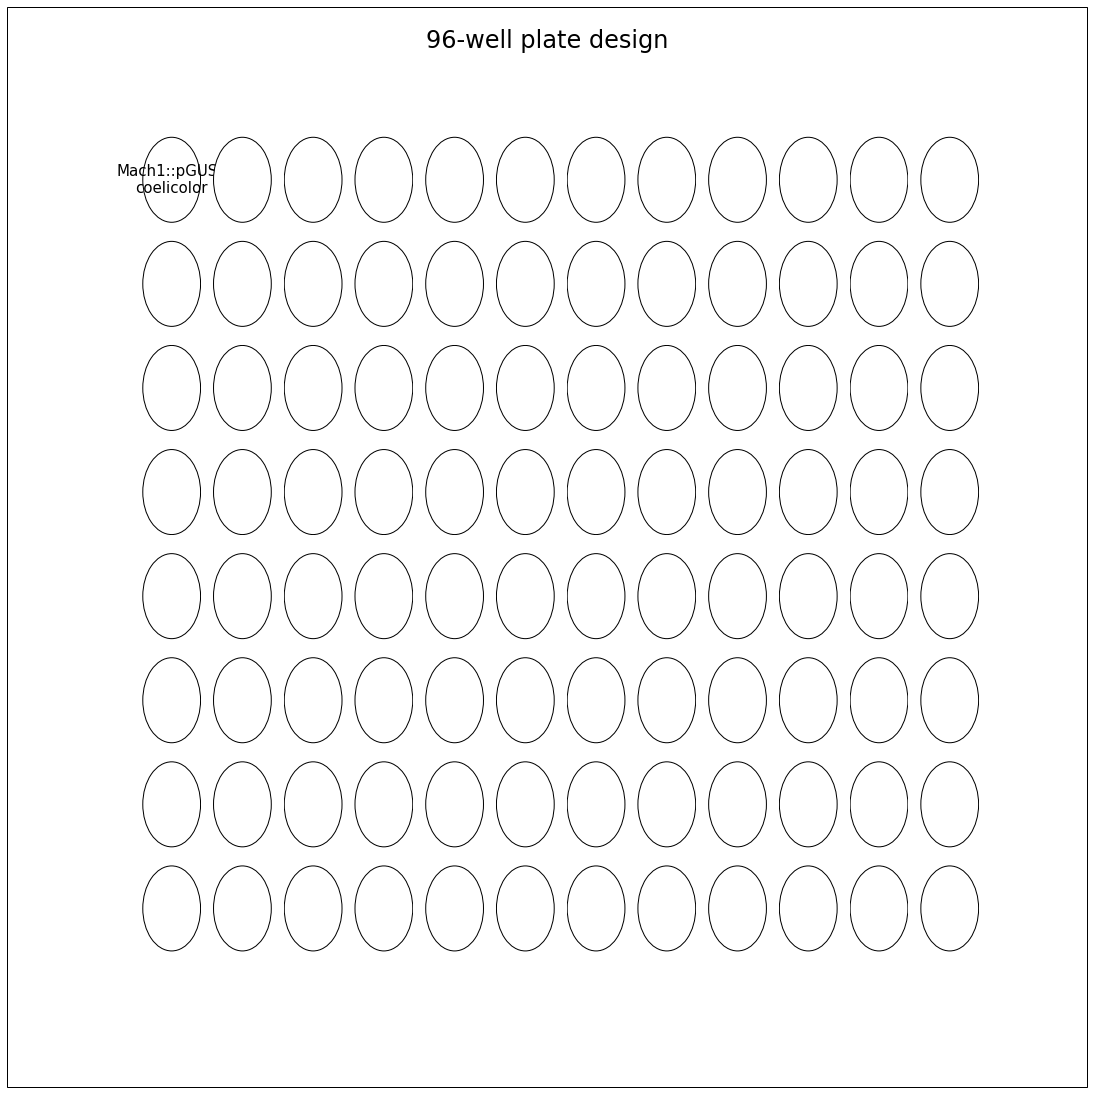

In [8]:
display_96well_plate_design(plate_fill_ins, "Conjugation")

This plate design, as well as the rack setups will all be saved in separate .jpg files with similar name to the runlog of the experiment for easy traceability.

### Create the Python script for the Opentrons :
The last step now is to give your DTU email address to create the protocol you need to run the Opentrons as well as gather all files for your experiment in a single .zip file. 

In [9]:
runner = ConjugationRunner()
try:
    runner.display_form(ecoli=ecoli, streptomyces=streptomyces, 
                        conjugation_mix = conjugation_mix,
                        ecoli_tubes = ecoli_tubes,
                        plasmid_antibiotics = plasmid_antibiotics, 
                        competent_antibiotics = competent_antibiotics)
    
except Exception as error:
    print(error)    

/Users/tgrra/.opentrons/robot_settings.json not found. Loading defaults
/Users/tgrra/.opentrons/deck_calibration.json not found. Loading defaults


You have now succesfully run the transformation step on the Opentrons and can spread the mix on selection plates for O/N incubation at 30 degrees Celsius.

# Day 3: antibiotics on O/N plates

You will now add ddH2O with 5ul of plasmid selection antibiotic(s) (50mg/ml) to each plate and allow them to dry for a bit before placing them back in the 30 degrees Celsius incubator for a number of days until growth shows. When this happens you will re-plate them on ISP2 plates with selection antibiotics and nalidixic acid.